# Загрузка библиотек и данных

In [105]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [106]:
df = pd.read_csv(r"..\data\Churn_Raw_Data.csv")

In [107]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [108]:
df = df.drop(['customerID'], axis=1)

In [109]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Аномальных значения нет.

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Много категориальных данных. Total charges, скорее всего, числовой признак. А SeniorCitizen - категориальная.  

In [111]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Присуствует дисбаланс классов. В дальнейшем это нужно учесть.

# EDA

## Числовые признаки

TotalCharges - это число, а не строка. Обратим внимание, что есть пустые строки. Но пустые строки встречаются только у людей, который только что начали пользоваться услугами оператора. А значит их общие траты равны 0.

In [112]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [113]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: x if x != ' ' else 0)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [114]:
numeric_features = ['TotalCharges', 'MonthlyCharges', 'tenure']

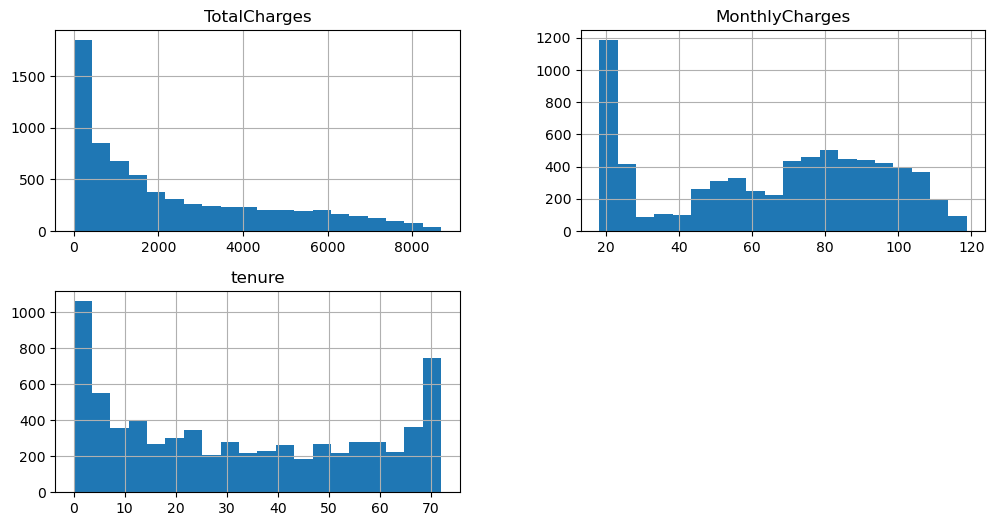

In [115]:
df[numeric_features].hist(bins=20, figsize=(12,6))
plt.show()

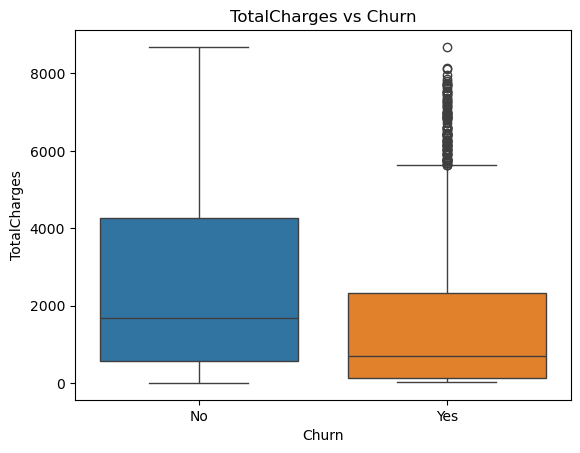

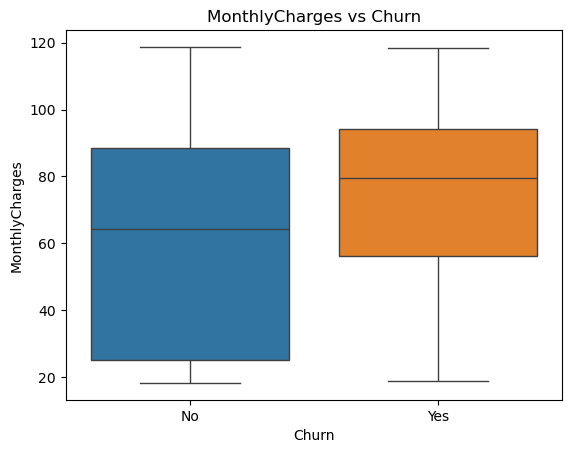

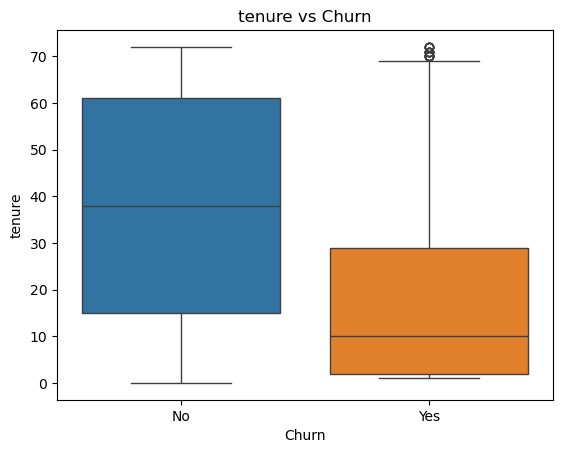

In [116]:
# Boxplot по target
for col in numeric_features:
    sns.boxplot(x='Churn', y=col, data=df, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.show()

ВЫВОДЫ: 
- Люди у которых высокие ежемесячные траты чаще отказываются от услуг
- Чем дольше клиент пользуется услугами оператора, тем выше его лояльность. А значит ниже вероятность его ухода
- У людей которые отказались от услуг ниже общие расходы за всё время. Логично, что люди которым не нравилось, пользовались услугами недолго, поэтому их общие расходы низкие. 

## Категориальные признаки

In [117]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [118]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [119]:
def plot_all_categorical_with_percent(df,categorical_features, target_col=None, max_features=None, figsize=(20, 15)):
    
    
    # Убираем целевую переменную если она есть
    if target_col and target_col in categorical_features:
        categorical_features.remove(target_col)
    
    # Ограничиваем количество признаков если нужно
    if max_features and len(categorical_features) > max_features:
        print(f"Показаны первые {max_features} из {len(categorical_features)} признаков")
        categorical_features = categorical_features[:max_features]
    
    if not categorical_features:
        print("Категориальные признаки не найдены")
        return
    
    # Создаем сетку графиков
    n_features = len(categorical_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    # Преобразуем axes в плоский массив
    if n_features == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for i, feature in enumerate(categorical_features):
        ax = axes[i]
        
        try:
            # Строим countplot
            if target_col and target_col in df.columns:
                # С hue по целевой переменной
                sns.countplot(data=df, x=feature, hue=target_col, ax=ax, palette='Set2')
            else:
                # Без hue
                sns.countplot(data=df, x=feature, ax=ax, color='skyblue')
            
            # Настройки графика
            ax.set_title(f'{feature}\n(Уник.: {df[feature].nunique()})', fontsize=12, fontweight='bold')
            ax.set_xlabel('')
            ax.set_ylabel('Количество', fontsize=10)
            
            # Поворачиваем подписи по X для лучшей читаемости
            ax.tick_params(axis='x', rotation=45)
            
            # Добавляем проценты на столбцы
            total = len(df)
            for p in ax.patches:
                height = p.get_height()
                if height > 0:  # Добавляем текст только для ненулевых столбцов
                    percentage = f'{100 * height / total:.1f}%'
                    ax.text(p.get_x() + p.get_width() / 2., height + total * 0.01,
                           percentage, ha='center', va='bottom', fontsize=8, fontweight='bold')
            
            # Убираем легенду для всех кроме первого графика (если есть hue)
            if target_col and target_col in df.columns and i != 0:
                ax.get_legend().remove()
            
        except Exception as e:
            ax.text(0.5, 0.5, f'Ошибка:\n{str(e)}', 
                   transform=ax.transAxes, ha='center', va='center', fontsize=10, color='red')
            ax.set_title(f'{feature}', fontsize=12)
    
    # Скрываем пустые subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

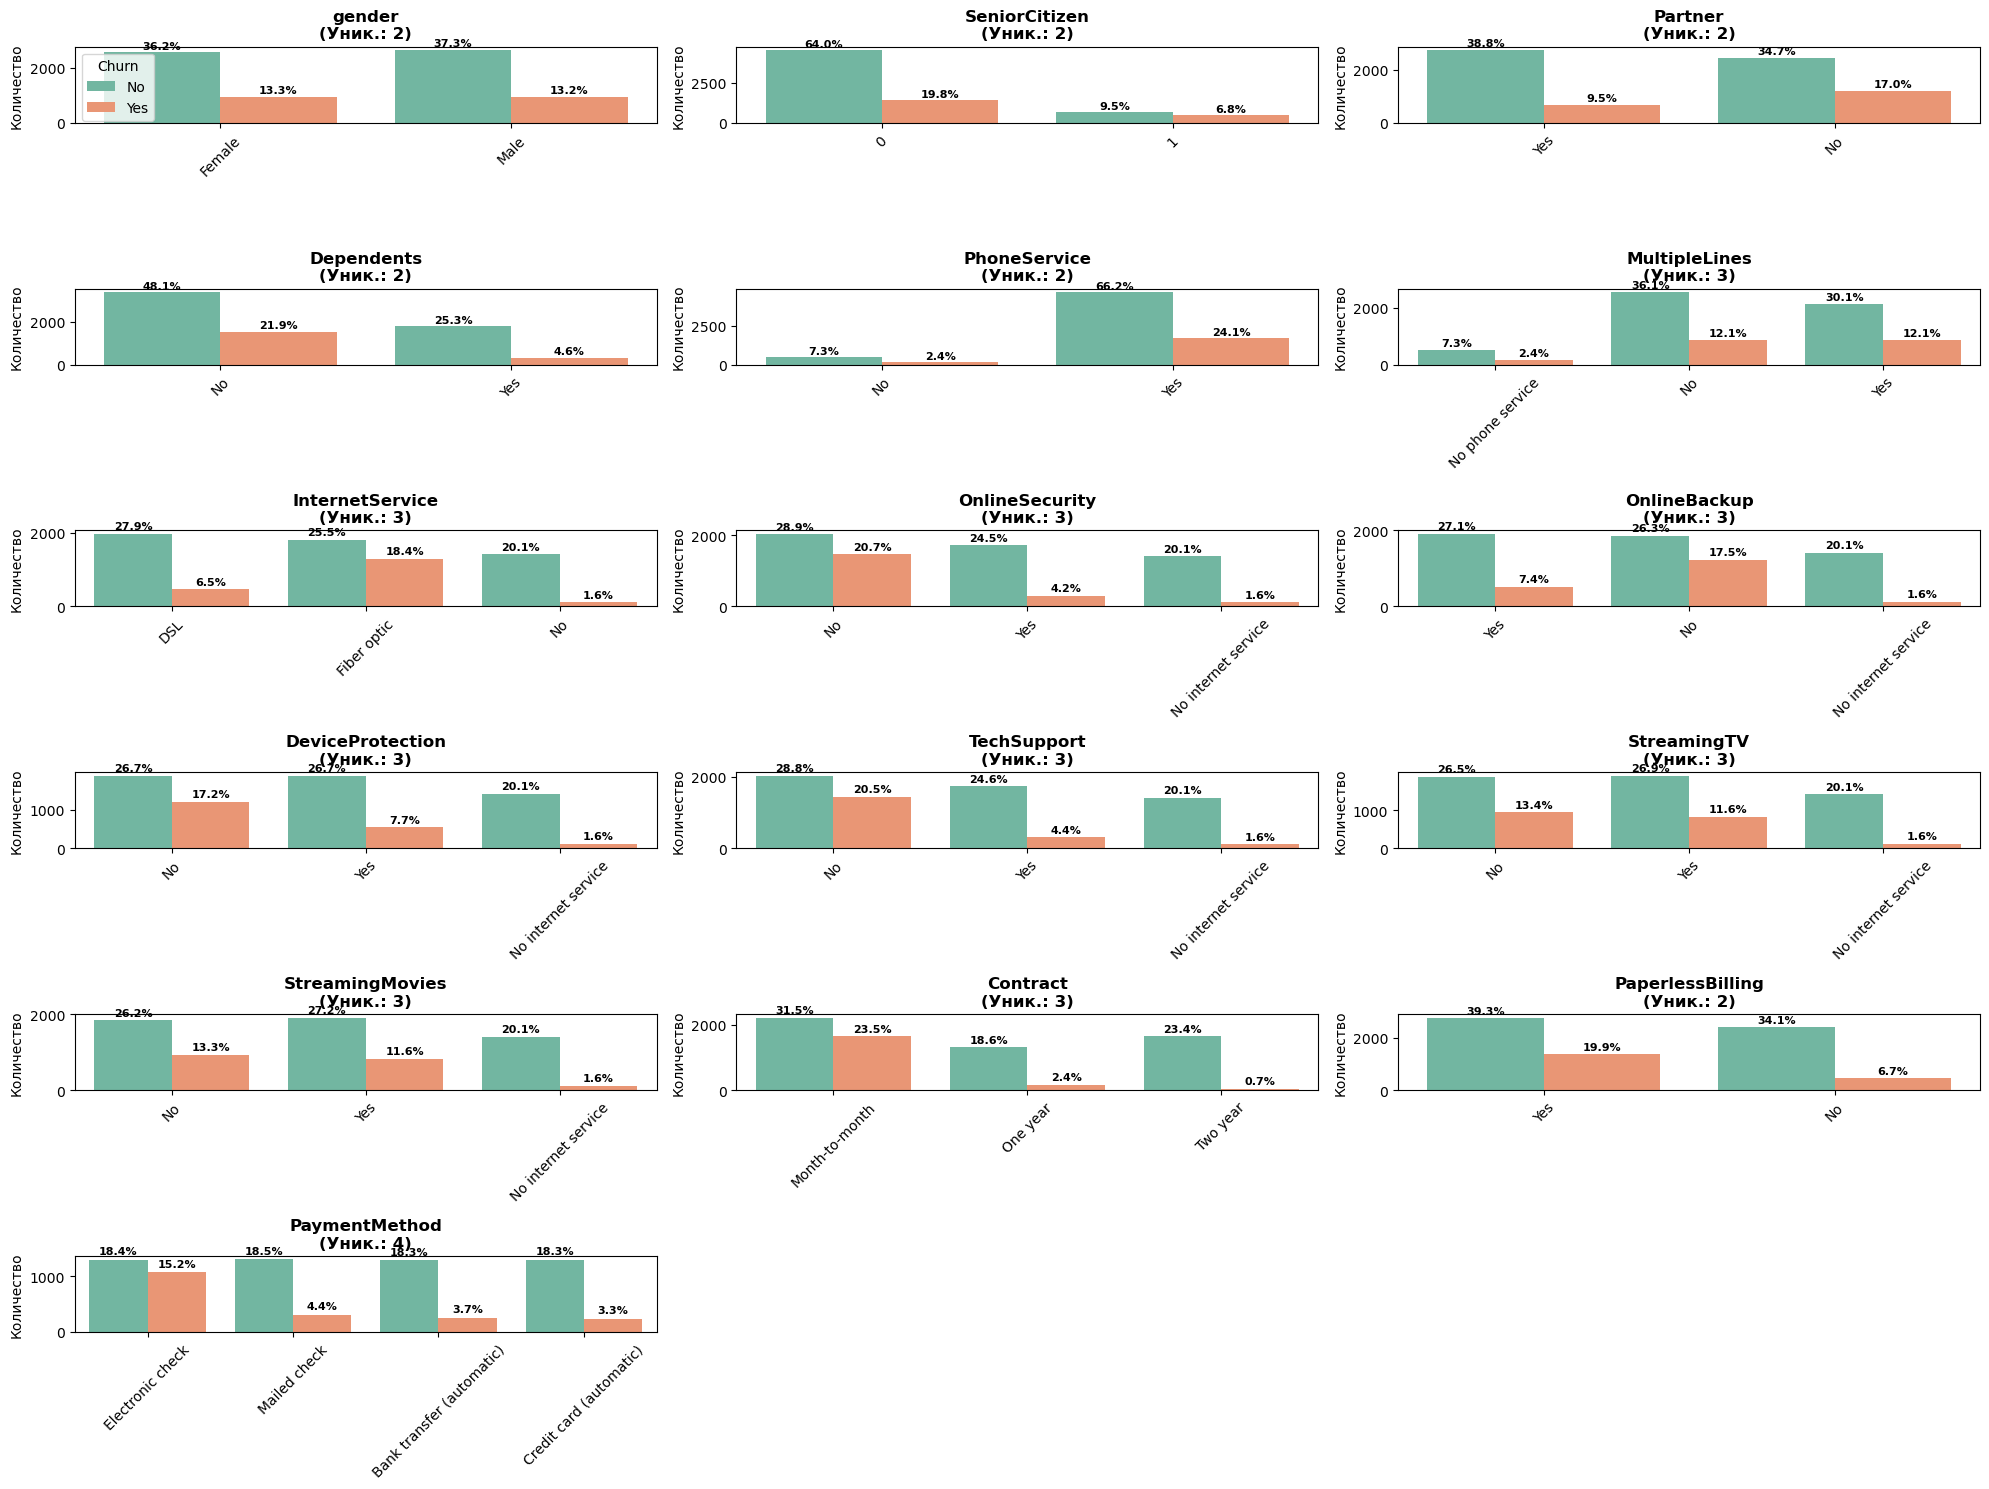

In [120]:
plot_all_categorical_with_percent(df, categorical_features, 'Churn')

Выводы:
- Среди клиентов мало пенсионеров. При этом доли оставшихся клиентов пенсионого возраста и ушедших равны. Возможно у пожилых людей есть свой патерн поведения.
- Одинокие люди гораздо чаще отказываются от услуг, чем семейные.

Важные признаки сигнализирующее об оттоке клиентов:
- Среди клиентов с InternetServices = Fibre optic.
- Отсутствие услуги OnlineSecurity/TechSupport/OnlineBackup/DeviceProtection 
- Тип контракта Month-to-month
- PaymentMethod == Electronic check

## Корреляции

In [121]:
df_corr

,TotalCharges,MonthlyCharges,tenure,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Churn_Yes
0,29.85,29.85,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1889.50,56.95,34,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,108.15,53.85,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,1840.75,42.30,45,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,151.65,70.70,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,24,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7039,7362.90,103.20,72,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7040,346.45,29.60,11,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7041,306.60,74.40,4,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


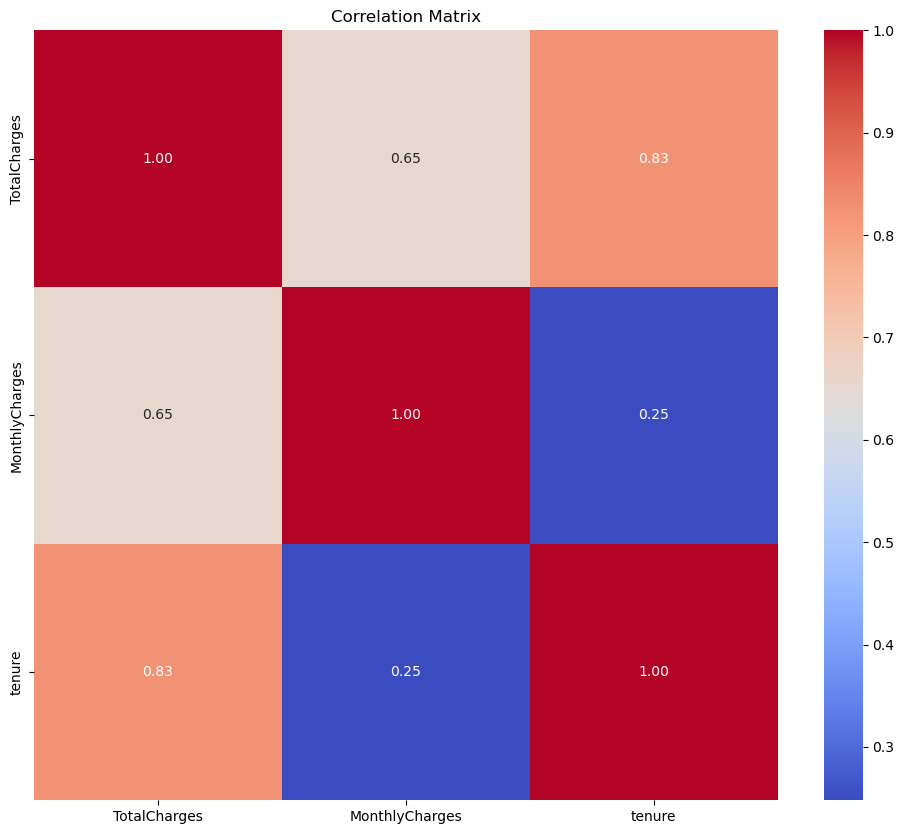

In [122]:
corr = df[numeric_features].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Есть сильная зависимоть между tenure и TotalCharges. Это логично, чем дольше клиент пользовался услугами, тем больше его расходы за весь период.

In [ ]:

le_dict = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

X = df[numeric_features + list(categorical_features)]
y = df['Churn']

# Вычисление Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features=[False]*len(numeric_features) + [True]*len(categorical_features), random_state=42)

mi_df = pd.DataFrame({'Feature': X.columns, 'MI_with_Churn': mi_scores})
mi_df = mi_df.sort_values(by='MI_with_Churn', ascending=False)

print(mi_df)


             Feature  MI_with_Churn
16          Contract       0.098453
2             tenure       0.073021
10    OnlineSecurity       0.064677
13       TechSupport       0.063021
9    InternetService       0.055574
11      OnlineBackup       0.046792
18     PaymentMethod       0.044519
0       TotalCharges       0.044135
12  DeviceProtection       0.043917
1     MonthlyCharges       0.039818
15   StreamingMovies       0.032001
14       StreamingTV       0.031908
17  PaperlessBilling       0.019194
6         Dependents       0.014467
5            Partner       0.011454
4      SeniorCitizen       0.010577
8      MultipleLines       0.000801
7       PhoneService       0.000072
3             gender       0.000037


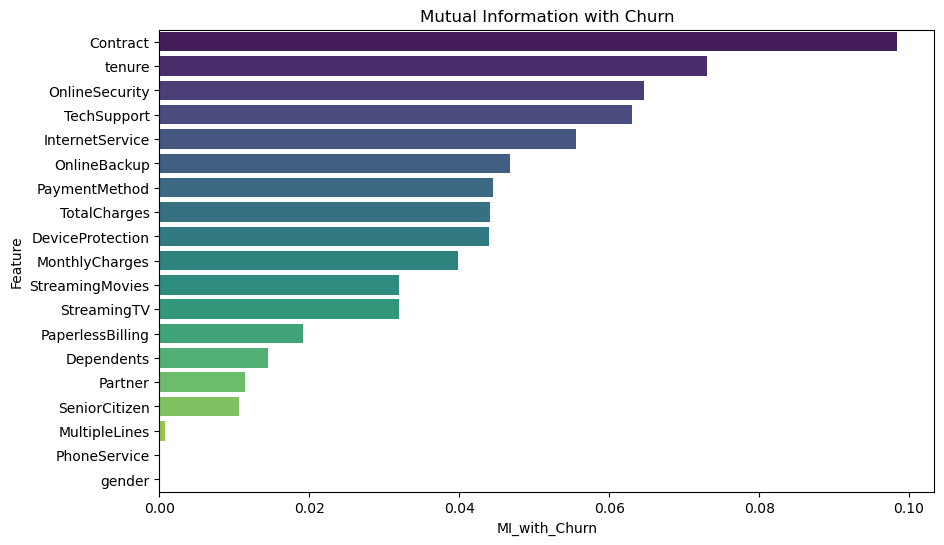

In [125]:
plt.figure(figsize=(10,6))
sns.barplot(x='MI_with_Churn', y='Feature', data=mi_df, hue='Feature',palette='viridis')
plt.title("Mutual Information with Churn")
plt.show()

# Data preprocessing  